In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import time
import copy

In [2]:
def count_nn_bugs(grid, yy, xx):
    pot_nn = [(yy+1, xx), (yy-1, xx), (yy, xx+1), (yy, xx-1)]
    tally = 0
    N = 5
    for nn_yy, nn_xx in pot_nn:
        if nn_yy < N and nn_yy >= 0 and nn_xx < N and nn_xx >= 0:
            if grid[nn_yy, nn_xx]:
                tally = tally + 1
    return tally
            
def iterate_grid(old_grid):
    N = 5
    new_grid = np.ones((N, N))*-1
    for yy in range(N):
        for xx in range(N):
            nn_bugs = count_nn_bugs(old_grid, yy, xx)
            if old_grid[yy, xx]:
                new_grid[yy, xx] = (nn_bugs == 1)
            else:
                if nn_bugs == 1 or nn_bugs == 2:
                    new_grid[yy, xx] = 1
                else:
                    new_grid[yy, xx] = 0
    return new_grid

def parse_grid(inp_string):
    inp_list = inp_string.split('\n')
    grid_list = []
    for ll in inp_list:
        ll_list = []
        for cc in ll:
            ll_list.append(cc == '#')
        grid_list.append(ll_list)
    return np.array(grid_list)

def calculate_biodiversity_rating(grid):
    tally = 0
    N = 5
    for ii in range(N*N):
        if grid[ii//N, ii%N]:
#             print(ii, 2**ii)
            tally = tally + 2**ii
    return tally

In [3]:
### Grid_dict is a dict from level to a grid if the grid is there

def iterate_grid_rec(old_grid_dict):
    N = 5
    L_min = min(old_grid_dict.keys())
    L_max = max(old_grid_dict.keys())
    if np.sum(old_grid_dict[L_min]) > 0:
        old_grid_dict[L_min-1] = np.zeros((N, N))
        L_min = L_min - 1
    if np.sum(old_grid_dict[L_max]) > 0:
        old_grid_dict[L_max+1] = np.zeros((N, N))
        L_max = L_max + 1
    
    new_grid_dict = {}
    for L in range(L_min, L_max+1):
        new_grid = np.ones((N, N))*-1
        for yy in range(N):
            for xx in range(N):
                if yy == 2 and xx == 2:
                    new_grid[yy, xx] = 0
                else:
                    nn_bugs = count_nn_bugs_rec(old_grid_dict, yy, xx, L)
                    if old_grid_dict[L][yy, xx]:
                        new_grid[yy, xx] = (nn_bugs == 1)
                    else:
                        if nn_bugs == 1 or nn_bugs == 2:
                            new_grid[yy, xx] = 1
                        else:
                            new_grid[yy, xx] = 0
        new_grid_dict[L] = new_grid
    return new_grid_dict
    

def count_nn_bugs_rec(grid_dict, yy, xx, level):
    pot_nn = [(yy+1, xx, level), (yy-1, xx, level), (yy, xx+1, level), (yy, xx-1, level)]
#     pot_nn_type_2 = []
    tally = 0
    N = 5
    for nn_yy, nn_xx, nn_level in pot_nn:
#         print(nn_yy, nn_xx, nn_level)
        if nn_yy >= N:
            nn_yy = 3
            nn_xx = 2
            nn_level = nn_level - 1
        if nn_xx >= N:
            nn_yy = 2
            nn_xx = 3
            nn_level = nn_level - 1
        if nn_yy < 0:
            nn_yy = 1
            nn_xx = 2
            nn_level = nn_level - 1
        if nn_xx < 0:
            nn_yy = 2
            nn_xx = 1
            nn_level = nn_level - 1
#         print(nn_yy, nn_xx, nn_level)
        if nn_yy == 2 and nn_xx == 2:
            if yy == 1:
                sub_points = [(0, rr, nn_level+1) for rr in range(5)]
            if yy == 3:
                sub_points = [(4, rr, nn_level+1) for rr in range(5)]
            if xx == 1:
                sub_points = [(rr, 0, nn_level+1) for rr in range(5)]
            if xx == 3:
                sub_points = [(rr, 4, nn_level+1) for rr in range(5)]
            for sub_yy, sub_xx, sub_level in sub_points:
                if sub_level in grid_dict.keys() and grid_dict[sub_level][sub_yy, sub_xx]:
                    tally = tally + 1
        else:
#         if nn_yy < N and nn_yy >= 0 and nn_xx < N and nn_xx >= 0:
            if nn_level in grid_dict.keys() and grid_dict[nn_level][nn_yy, nn_xx]:
#                 print(grid_dict[nn_level][nn_yy, nn_xx])
                tally = tally + 1
    return tally

def count_bugs(grid_dict):
    tally = 0
    for L in grid_dict.keys():
        tally = tally + np.sum(grid_dict[L])
    return tally

Part one solution: 3186366


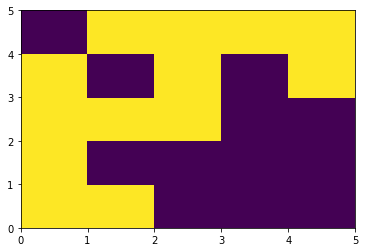

In [4]:
inp_ex = """###..
#...#
.#.##
##.#.
#.###"""

grid = parse_grid(inp_ex)
past_ratings = set([])
while True:
    grid = iterate_grid(grid)
    rating = calculate_biodiversity_rating(grid)
    if rating in past_ratings:
        print('Part one solution: %s' %rating)
        plt.pcolormesh(grid[list(range(4, -1, -1)), :])
        break
    else:
        past_ratings.add(rating)

Part two solution: 2031.0


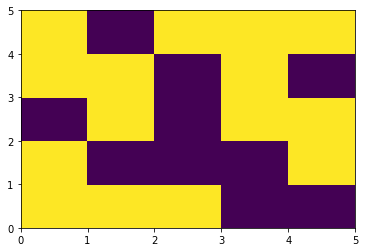

In [5]:
inp_ex = """###..
#...#
.#.##
##.#.
#.###"""

grid = parse_grid(inp_ex)
grid_dict = {0: grid}
plt.pcolormesh(grid_dict[0])

for _ in range(200):
    grid_dict = iterate_grid_rec(grid_dict)

print('Part two solution: %s' %count_bugs(grid_dict))
